# Penguins Mini-Project

Authors: Fabian Sefranek & Luis Kreihsl

## Dataset

The dataset used is the palmer-penguins dataset. This dataset contains size measurements, clutch observations and blood isotope ratios for three penguin species observed on three islands in the Palmer Archipelago, Antarctica over a study period of three years. The data were collected from 2007-2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program in the Antarctica.

The dataset contains 344 rows, or individual penguins and the following columns:
- species `string` class [Adelie, Gentoo, Chinstrap]
- island `string` class [Biscoe, Dream, Torgersen]
- bill_length_mm `float`
- bill_depth_mm `float`
- flipper_length_mm `float`
- body_mass_g `float`
- sex `string` class [male, female]
- year `int`

The following pictures may provide a reference for the different species and the bill lengths:

![Penguin Species](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/gorman-penguins.jpg)

![Bill Explaination](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

# Research Questions

1. Can one predict the species of a penguin based on the bill length and flipper length?
2. What factors strongly influence the weight of a penguin?

# Load library

In [15]:
import seaborn as sns

sns.set_theme()
penguins = sns.load_dataset('penguins')


# Plots

## 1D

### Histogram

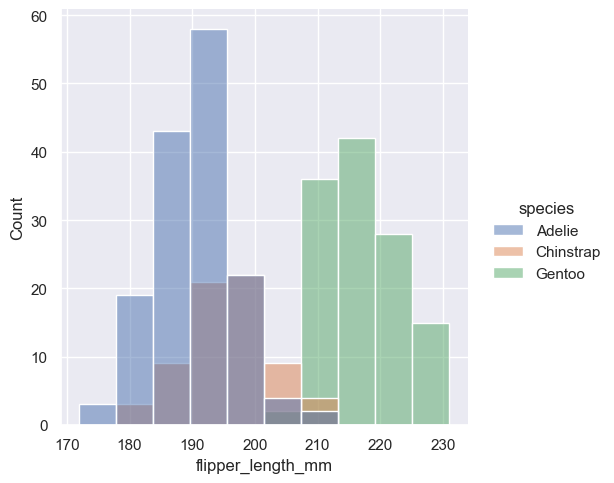

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="hist")

The histogram shows the distribution of flipper lengths for three penguin species: Adelie, Chinstrap, and Gentoo. Adelie penguins have shorter flipper lengths clustered around 190mm, Chinstrap penguins have slightly longer flippers around 200mm, and Gentoo penguins have the longest flippers ranging between 210mm and 230mm.

### Boxplot

<Axes: xlabel='body_mass_g', ylabel='species'>

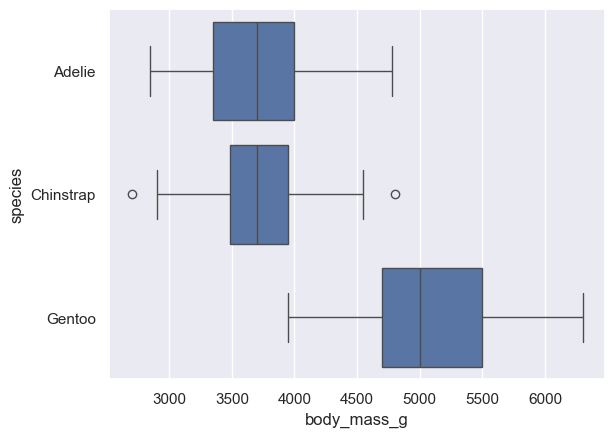

In [17]:
sns.boxplot(x="body_mass_g", y="species", data=penguins)

The boxplot compares the body mass of three penguin species: Adelie, Chinstrap, and Gentoo. Gentoo penguins have the highest body mass, ranging from around 4500g to 6000g, while Adelie and Chinstrap penguins have lower body masses, generally between 3000g and 4500g, with a few outliers.

## 2D

### Scatterplot

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

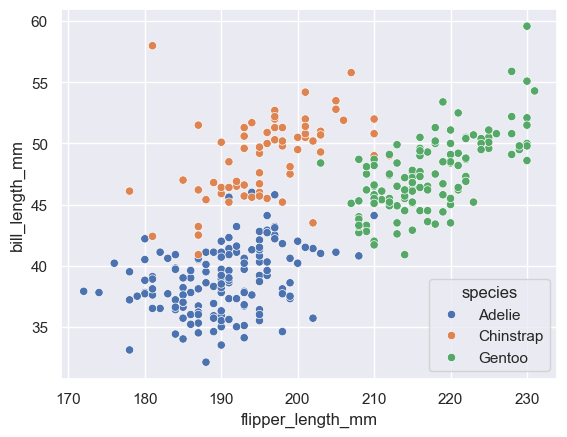

In [18]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')

The scatterplot shows the relationship between flipper length and bill length for the three penguin species. Adelie penguins (blue) have shorter flippers and smaller bills, Chinstrap penguins (orange) have similar flipper lengths but longer bills, and Gentoo penguins (green) have the longest flippers and larger bills overall.

### Strip Plot

<Axes: xlabel='species', ylabel='body_mass_g'>

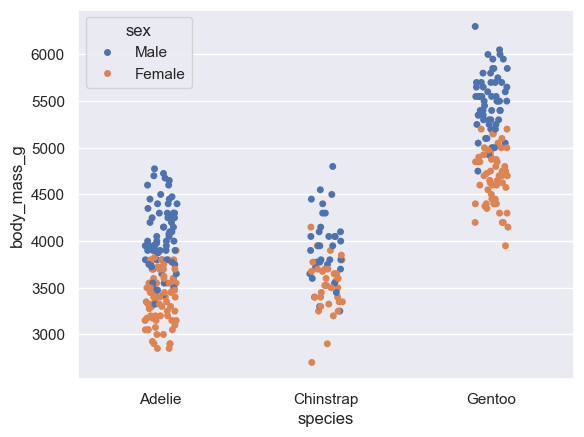

In [19]:
sns.stripplot(data=penguins, x="species", y="body_mass_g", hue="sex", jitter=True)

This strip plot compares the body mass of female and male penguins, seperated by their species. Almost all male (blue) penguins weigh more than female (orange) penguins and Gentoo penguins way generally more compared to the others.

## Classification Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np

X = penguins.dropna()[['flipper_length_mm', 'bill_length_mm']].to_numpy()
y = penguins.dropna()['species'].dropna().to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 99)

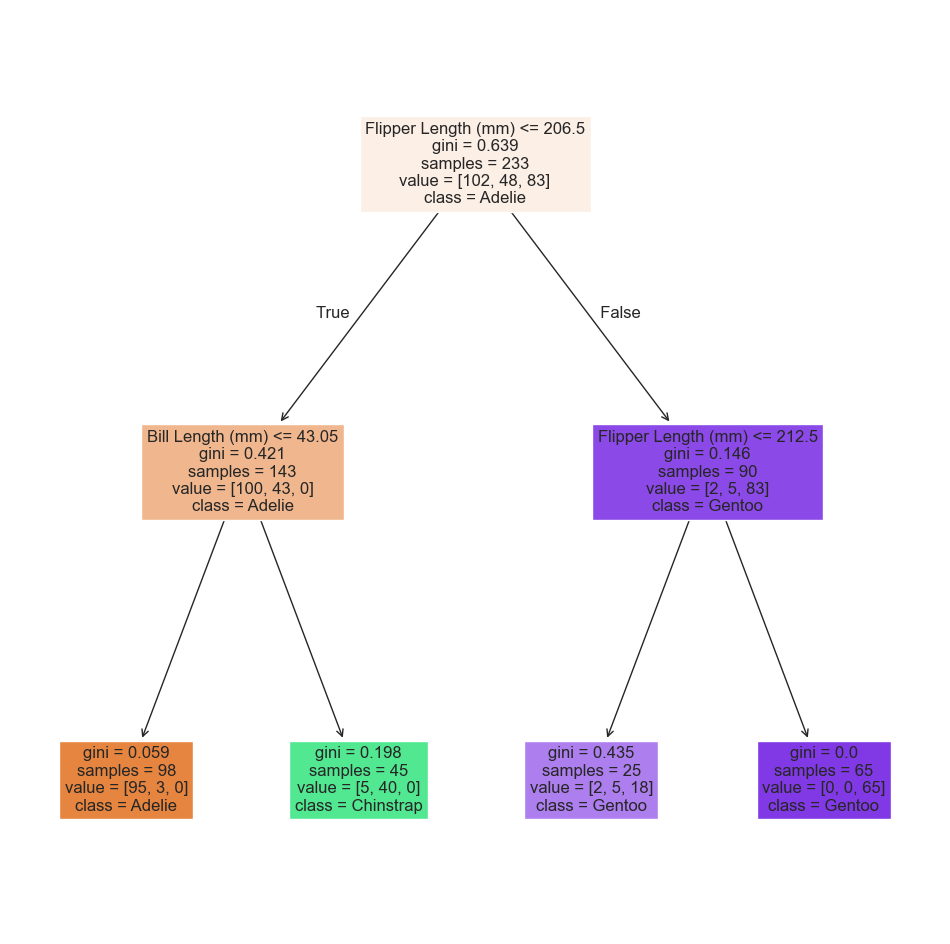

In [21]:
classification_tree = DecisionTreeClassifier(random_state=1, max_depth=2)

classification_tree.fit(X_train, y_train)

pyplot.figure(figsize=(12,12))
plot_tree(classification_tree, feature_names=["Flipper Length (mm)", "Bill Length (mm)"], class_names=classification_tree.classes_, filled=True, fontsize=12)
pyplot.show()

In [22]:
y_pred = classification_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy}')

scores = cross_val_score(classification_tree, X, y, cv=5)

mean_accuracy = np.mean(scores)
print(f'Mean Cross Validation Accuracy: {mean_accuracy}')

Validation Accuracy: 0.96
Mean Cross Validation Accuracy: 0.9338308457711444


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=1, n_estimators=100)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(f'Validation Accuracy: {accuracy_score(y_test, y_pred)}')


Validation Accuracy: 0.95


In [24]:
scores = cross_val_score(random_forest, X, y, cv=5)

mean_accuracy = np.mean(scores)
print(f'Mean Cross Validation Accuracy: {mean_accuracy}')

Mean Cross Validation Accuracy: 0.9578471279963818


## Linear Model

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)

logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = logistic_regression.predict(X_test)

print(f'Validation Accuracy: {accuracy_score(y_test, y_pred)}')

Validation Accuracy: 0.98
